˙ 최건호, 『파이토치 첫걸음』, 한빛미디어 Ch03 션형회귀분석 부분을 토대로 학습합니다

In [0]:
import torch

In [26]:
# 데이터의 기본 단위 : Tensor, 다차원 배열(array)
# (2, 3) shape로 텐서 안 원소에는 임의 난수가 들어감
X = torch.Tensor(2,3)
X

tensor([[1.6281e-35, 0.0000e+00, 4.4842e-44],
        [0.0000e+00,        nan, 1.3312e-43]])

˙인수 (Argument) : 함수를 호출할 때 사용되는 값 </br>
˙인자 (Parameter) : 함수 정의 시 외부로부터 받아들이는 임의의 값

In [27]:
X = torch.Tensor([[1, 2, 3], [4, 5, 6]])
X

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [28]:
# 기울기 계산
x = torch.tensor(data=[2.0, 3.0], requires_grad=True)  # requires_grad -> 기울기 저장 여부
y = x**2
z = 2*y + 3
target = torch.tensor([3.0, 4.0]) # 목표값
loss = torch.sum(torch.abs(z-target))
loss.backward()

print('x.grad :', x.grad, 'y.grad:', y.grad, 'z.gard:', z.grad)

x.grad : tensor([ 8., 12.]) y.grad: None z.gard: None


In [29]:
# 선형회귀분석 모델 구현
import torch.nn as nn # 신경망 모델
import torch.optim as optim # 경사하강법
import torch.nn.init as init # 텐서에 초깃값을 주기 위해 필요

data = 1000
epochs = 500
# (1000, 1) 모양의 tensor 생성, 이걸 init.uniform_함수를 통해 -10, 10의 범위로 uniformly하게 초기화
x = init.uniform_(torch.Tensor(data, 1), -10, 10)
x[:5]


tensor([[-1.7159],
        [-3.2257],
        [ 2.8610],
        [ 5.4851],
        [-7.4917]])

In [30]:
noise = init.normal_(torch.Tensor(data, 1), std=1)
noise[:5]

tensor([[-0.7932],
        [ 0.0857],
        [ 0.7749],
        [ 0.2599],
        [-0.0230]])

In [0]:
# y는 x에 대한 종속 변수, 연산을 통해 값 초기화
y = 2*x + 3
# noise 추가하는 이유는 보통 들어오는 데이터들은 노이즈 추가되어 있음, 현실성 반영 위해 추가
y_noise = 2*(x+noise)+3

In [0]:
model = nn.Linear(1, 1)  # 들어오는 feature 수, 결과 나오는 특성 수, 편차 사용 여부 초기 인수로 받아서 생성
# 변수는 weight, bias
# 우리 데이터는 x, y 모두 1개의 특성을 가진 데이터 1000개니까 인수 모델을 (1, 1)
loss_func = nn.L1Loss() # L1 손실 = sum(abs(x, y))/n

In [0]:
# 최적화할 변수로 model.parameters() 함수 사용해 선형 회귀 모델의 변수 w, b 전달 
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [43]:
loss_arr =[]
label = y_noise
for i in range(epochs):
  optimizer.zero_grad() # 각 반복시 학습했던 기울기를 0으로 초기화
  output = model(x) # 선형 회귀 모델에 x를 전달, 결과를 output 변수에 저장

  loss = loss_func(output, label)
  loss_arr.append(loss)
  loss.backward()
  optimizer.step() # 인수로 들어갔던 model.params에서 리턴되는 변수의 기울기에 lr을 곱해서 빼주고 업뎃

  if i % 10 == 0:
    print('loss.data:', loss.data)
    param_list = list(model.parameters())
    print('w= ', param_list[0].item(), '| b =', param_list[1].item())


loss.data: tensor(1.5183)
w=  1.9845234155654907 | b = 2.9200079441070557
loss.data: tensor(1.5182)
w=  1.9842411279678345 | b = 2.9215476512908936
loss.data: tensor(1.5182)
w=  1.9841395616531372 | b = 2.923107385635376
loss.data: tensor(1.5182)
w=  1.9839826822280884 | b = 2.9244868755340576
loss.data: tensor(1.5182)
w=  1.9838258028030396 | b = 2.9258663654327393
loss.data: tensor(1.5182)
w=  1.9836689233779907 | b = 2.927245855331421
loss.data: tensor(1.5181)
w=  1.983512043952942 | b = 2.9286253452301025
loss.data: tensor(1.5181)
w=  1.983355164527893 | b = 2.930004835128784
loss.data: tensor(1.5181)
w=  1.9831902980804443 | b = 2.9311840534210205
loss.data: tensor(1.5181)
w=  1.9830446243286133 | b = 2.9323432445526123
loss.data: tensor(1.5181)
w=  1.9830769300460815 | b = 2.9333627223968506
loss.data: tensor(1.5181)
w=  1.9829257726669312 | b = 2.9342033863067627
loss.data: tensor(1.5181)
w=  1.982935905456543 | b = 2.9350242614746094
loss.data: tensor(1.5181)
w=  1.983068466186

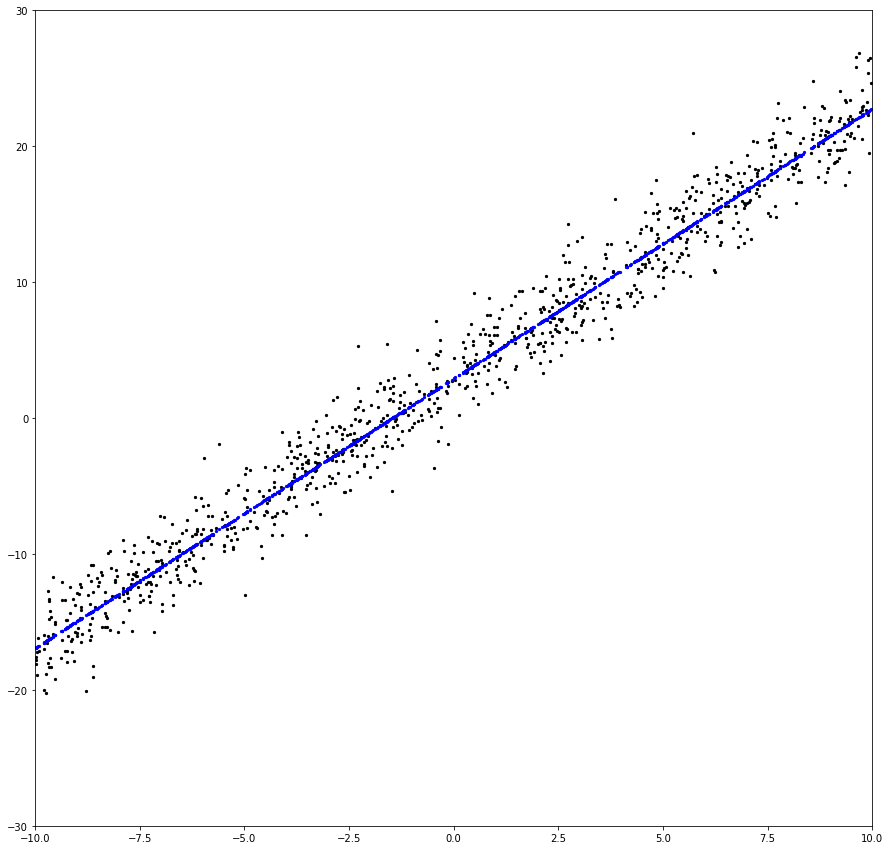

In [42]:
# 학습 결과

import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plt.scatter(x.numpy(),y_noise.numpy(),s=5,c="black")
plt.scatter(x.detach().numpy(),output.detach().numpy(),s=5,c="blue")
plt.axis([-10, 10, -30, 30])
plt.show()

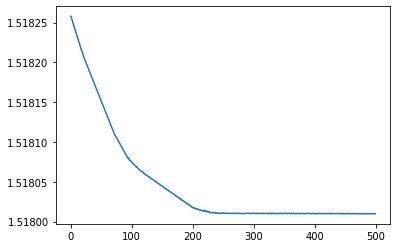

In [44]:
# epoch에 따른 손실의 감소
plt.plot(loss_arr)
plt.show()